<a href="https://colab.research.google.com/github/lucasestrela/dec_consumo_poupanca/blob/main/Lista2_Base_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema 1) 

Considere um modelo composto por um único bem, que é não durável. A restrição orçamentária do consumidor pode ser escrita do seguinte modo

$$P^C_{t+1} A_{t+1} = (P^C_t A_t + P^C_t Y_t - P^C_t C_t) R^P_{t+1}$$

em que $A_t$, $Y_t$, $C_t$ são, respectivamente, a riqueza, a renda e o consumo de não-duráveis no período $t$ em termos reais (medidos em unidades do bem de consumo); $P^C_t$ é o nível de preço referente ao consumo de bens não-duráveis. Ainda, $R^P_{t+1}$ é o retorno ''nominal'' portfolio do consumidor no período $t + 1$, que depende das decisões de investimentos feitas no período $t$, como segue

$$ R^P_{t+1} = \sum_{i=1}^N \omega_{i,t} R_{i,t+1}$$

em que $\omega_{i,t}$ é a fração de $A_t + Y_t  C_t$ investida no ativo $i$ no período $t$, cujo retorno futuro é dado por $R_{i, t+1}$. É comum usar a notação $R_{i,t+1} = 1 + r_{i, t+1}$. 

Considere, então, a seguinte restrição orçamentária

\begin{align}
P^C_{t+1} A_{t+1} = (P^C_t A_t + P^C_t Y_t - P^C_t C_t) + \sum_{i=1}^N \omega_{i,t} (1 + r_{i, t+1}) \tag{1}
\end{align}

Façamos o seguinte ajuste na restrição orçamentária (1) para obter variáveis em termos $r$

\begin{align}
\frac{1}{P^C_{t+1}} P^C_{t+1} A_{t+1} & = \frac{1}{P^C_{t+1}} \frac{P^C_t}{P^C_t} (P^C_t A_t + P^C_t Y_t - P^C_t C_t) + \sum_{i=1}^N \omega_{i,t} (1 + r_{i, t+1}) \\
A_{t+1} & =  (A_t + Y_t - C_t) + \sum_{i=1}^N \omega_{i,t} (1 + r_{i, t+1})
\end{align}

Defina a inflação


\begin{align}
\pi^C_{t+1} \equiv \frac{\pi^C_{t+1}}{\pi^C_{t}} - 1 \Rightarrow \frac{\pi^C_{t}}{\pi^C_{t+1}} =  \frac{1}{1+\pi^C_{t+1}}
\end{align}

Com isso, a restrição orçamentária (1) torna-se

\begin{align}
A_{t+1} = (A_t + Y_t  C_t) \sum^N_{i=1}  \omega_{i,t}  \frac{(1 + r_{i, t+1})}{(1 + \pi^C_{t+1})}
\end{align}

## Item a)
Considere que se queira estimar um modelo caracterizado pela restrição orçamentária (1) e que a medida de consumo seja o consumo de bens não-duráveis. Discuta como as variáveis poderiam ser deflacionadas.

---
**Resposta**

Se uma variável está medida no período $t_1$ e queremos deflacioná-la ao período $t_0$, basta dividir as variáveis pela inflação ($\pi^C$) acumulada do período $t_0$ ao período $t_1$.


## Item b)

Considere que se queira estimar um modelo caracterizado pela restrição orçamentária (1) e que a medida de consumo seja o consumo de bens não-duráveis e serviços. Discuta como as variáveis poderiam ser deflacionadas. Observação: seja $P^S_t$ o nível de preços de serviços no período $t$.

---

**Resposta**

Podemos criar um índice baseado em uma cesta de consumo para um agente representativo que consome uma parcela $\lambda_t$ de $C^S_t$ (consumo de serviços quaisquer) e $1-\lambda_t$ de $C^C_t$ (consumo de bens nao duráveis quaisquer), tal que

\begin{align}
  C_t \equiv \lambda_t C^S_t  + (1-\lambda_t) C^C_t.
\end{align}

Da mesma forma, se os bens estão medidos em termos de consumo não duráveis e serviços podemos criar um índice de preços

\begin{align}
  P_t \equiv \lambda_t P^S_t  + (1-\lambda_t) P^C_t.
\end{align}

e proceder da mesma forma ao descrito em a), deflacionando as variáveis pelo acumulado de $P$ entre $t_0$ e $t_1$.


## Item c) 

Considerando a base de dados descrita no restante da lista, apresente:


1.   $P^C_t$ e $1+\pi^C = \frac{P^C_t}{P^C_{t-1}} - 1$
2.   $P^{FI}_t$ (Fisher's Ideal Price Index) que leva em conta $P^C_t$ e $P^S_t$ , e $\pi^{FI}_t = \frac{P^{FI}_t}{P^{FI}_{t-1}} - 1$
3.   $P^{DI}_t$ (Divísia Index) e $1 + \pi^{DI}_t = (1 + \pi^C_t)^{C_t/(C_t+S_t)} + (1 + \pi^S_t)^{S_t/(C_t+S_t)}$, em que $C_t$ e $S_t$ são os consumos nominais de bens não-duráveis e serviços, respectivamente

### Programação - CHECAR (2)

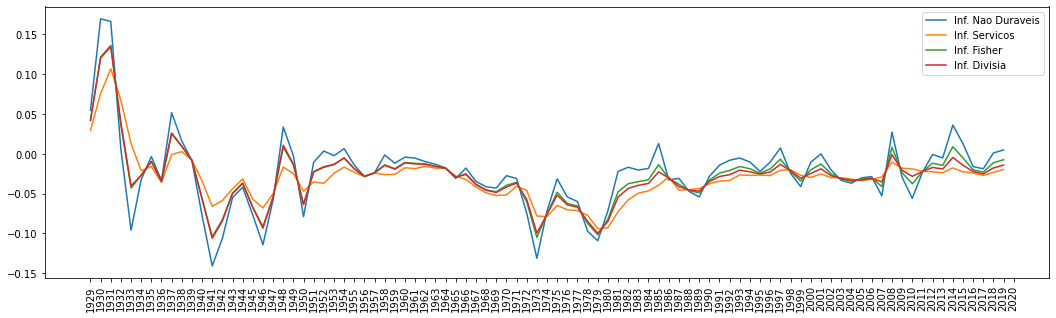

In [66]:
# 1
price_annual['pi_c'] = price_annual['p_cnd']/price_annual['p_cnd'].shift(-1) - 1
price_annual['pi_cs'] = price_annual['p_cs']/price_annual['p_cs'].shift(-1) - 1

# 2
price_annual['pi_fi'] = np.sqrt(price_annual['p_cnd']*price_annual['p_cs'])/np.sqrt(price_annual['p_cnd'].shift(-1)*price_annual['p_cs'].shift(-1)) - 1

# 3
price_annual['pi_di'] = (1+price_annual['pi_c'])**( cons_annual['cnd']/(cons_annual['cs'] + cons_annual['cnd']) ) * (1+price_annual['pi_cs'])**( cons_annual['cs']/(cons_annual['cs'] + cons_annual['cnd']) ) -1



fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 5))

axes.plot(price_annual['pi_c'], label='Inf. Nao Duraveis')
axes.plot(price_annual['pi_cs'], label='Inf. Servicos')
axes.plot(price_annual['pi_fi'], label='Inf. Fisher')
axes.plot(price_annual['pi_di'], label='Inf. Divisia')
axes.legend()
plt.xticks(rotation='vertical')
plt.show()

# Problema 2) 

Considere um modelo composto por bens não-duráveis, serviços e bens-duráveis. A restrição orçamentária do consumidor pode ser escrita do seguinte modo:

\begin{align}
P^C_{t+1} A_{t+1} = (P^C_t A_t + P^C_t Y_t - P^C_t C_t  - P^S_t S_t - P^D_t D_t ) R^{P}_{t+1}
\end{align}


em que $A_t$, $Y_t$, $C_t$, $S_t$ e $D_t$ são, respectivamente, a riqueza, a renda, o consumo de não-duráveis, o consumo de serviços e o consumo de bens duráveis no período $t$. Enquanto $P^C_t$ é o nível de preços relacionado a bens não-duráveis, $P^S_t$ refere-se aos serviços e $P^D_t$ refere-se aos bens duráveis. Como no **Problema 1**, $R^P_{t+1}$ é o retorno nominal do portfolio do consumidor no período $t + 1$, é dado por:

$$R^{ \bar{P} }_{t+1} = \sum^N_{i=1} \omega_{i,t} \bar{R}_{i,t+1} = \sum^{N}_{i=1} \omega_{i,t} (1+r_{i,t+1})$$


Considere, então, a seguinte restrição orçamentária


\begin{align}
P^C_{t+1} A_{t+1} = (P^C_t A_t + P^C_t Y_t - P^C_t C_t  - P^S_t S_t - P^D_t D_t ) \sum^{N}_{i=1} \omega_{i,t} (1+r_{i,t+1}) \tag{2}
\end{align}

Façamos o seguinte ajuste na restrição orçamentária (2) para obter variáveis em $t$ para obter as variáveis em níveis reais

\begin{align}
      \frac{1}{P^C_{t+1}} P^C_{t+1} A_{t+1} = \frac{1}{P^C_{t+1}} \frac{P^C_t}{P^C_t}  (P^C_t A_t + P^C_t Y_t - P^C_t C_t  - P^S_t S_t - P^D_t D_t ) \sum^{N}_{i=1} \omega_{i,t} (1+r_{i,t+1}) \\
      A_{t+1} = (A_t + Y_t - C_t  - \frac{P^S_t}{P^C_t} S_t - \frac{P^D_t}{P^C_t} D_t ) \sum^{N}_{i=1} \omega_{i,t} \frac{(1+r_{i,t+1})}{(1+\pi^C_{t+1})}
\end{align}

## Item a) 

Considere que se queira estimar um modelo caracterizado pela restrição orçamentária (2). Discuta como as variáveis poderiam ser deflacionadas. 

---
**Resposta**

Como a restrição orçamentária está medida em termos de unidades de consumo de bens não duráveis, para deflacionar, basta dividir pela inflação acumulada deste bem.

## Item b) 

Considerando a base de dados descrita no restante da lista, apresente a evolução dos dois preços relativos

\begin{align}
\frac{P^S_t}{P^C_t} \quad e \quad \frac{P^D_t}{P^C_t}
\end{align}

Ao longo do tempo, quais tipos de consumo se tornaram relativamente mais caros (baratos)? Esses preços relativos dependem do ano base dos índices de preços?

### Programação

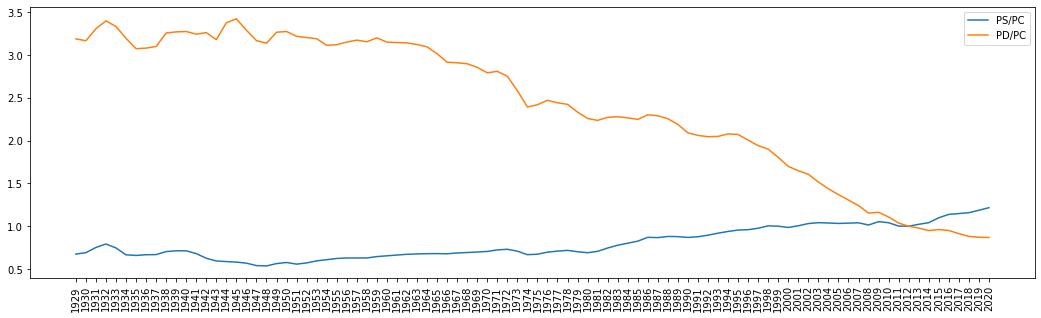

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 5))

axes.plot(price_annual['p_cs']/price_annual['p_cnd'], label='PS/PC')
axes.plot(price_annual['p_cd']/price_annual['p_cnd'], label='PD/PC')
axes.legend()
plt.xticks(rotation='vertical')
plt.show()

Vemos que os serviços ficaram mais caros em relação aos não duráveis e os duráveis ficaram mais baratos em relação aos não duráveis

# Problema 3)

Considere um modelo composto por bens não-duráveis, serviços e bens-duráveis. A restrição orçamentária do consumidor pode ser escrita do seguinte modo: 

\begin{align}
P^C_{t+1} A_{t+1} = (P_t A_t + P_t Y_t - P^C_t C_t  - P^S_t S_t - P^D_t D_t ) R^{P}_{t+1}
\end{align}

em que $A_t$, $Y_t$, $C_t$, $S_t$ e $D_t$ são, respectivamente, a riqueza, a renda, o consumo de não-duráveis, o consumo de serviços e o consumo de bens duráveis no período $t$. Enquanto $P^C_t$ é o nível de preços relacionado a bens não-duráveis, $P^S_t$ refere-se aos serviços e $P^D_t$ refere-se aos bens duráveis e $P_t$ é o índice de preço da cesta de consumo tal que:

\begin{align}
1 + \pi_t = (1 + \pi^C_t )^{\frac{C_t}{T_t}} (1 + \pi^S_t )^{\frac{S_t}{T_t}} (1 + \pi^D_t )^{\frac{D_t}{T_t}}
\end{align}

em que $\pi_t$ é a taxa de inflação o associada $P_t$; $\pi^j_t$ é a taxa de inflação associada ao nível de preços $P^j_t$, $j = C,S,D$; $T_t = C_t + S_t + D_t$

Finalmente, como no **Problema 1**, $R^P_{t+1}$ é o retorno do portfolio do consumidor no período $t + 1$, dado por:

$$R^{ P }_{t+1} = \sum^N_{i=1} \omega_{i,t} R_{i,t+1} = \sum^{N}_{i=1} \omega_{i,t} (1+r_{i,t+1})$$

Considere, então, a seguinte restrição orçamentária:

\begin{align}
P_{t+1} A_{t+1} = (P_t A_t + P_t Y_t - P^C_t C_t  - P^S_t S_t - P^D_t D_t ) \sum^{N}_{i=1} \omega_{i,t} (1+r_{i,t+1}) \tag{3}
\end{align}

Façamos o seguinte ajuste na restrição orçamentária (3) para obter variáveis em termos reais:


\begin{align}
      \frac{1}{P_{t+1}} P_{t+1} A_{t+1} = \frac{1}{P_{t+1}} \frac{P_t}{P_t}  (P_t A_t + P_t Y_t - P^C_t C_t  - P^S_t S_t - P^D_t D_t ) \sum^{N}_{i=1} \omega_{i,t} (1+r_{i,t+1}) \\
      A_{t+1} = (A_t + Y_t - C_t  - \frac{P^S_t}{P^C_t} S_t - \frac{P^D_t}{P^C_t} D_t ) \sum^{N}_{i=1} \omega_{i,t} \frac{(1+r_{i,t+1})}{(1+\pi_{t+1})}
\end{align}

## Item a) 

Considere que se queira estimar um modelo caracterizado pela restrição orçamentária (3). Discuta como as variáveis poderiam ser deflacionadas.

---

**Resposta**

Para deflacionar, basta dividir a variável pelo acumulado da inflação da cesta de consumo.

## Item b) 

Considerando a base de dados descrita no restante da lista, apresente a evolução dos três preços relativos:

\begin{align}
\frac{P^C_t}{P_t} \quad , \quad \frac{P^S_t}{P_t} \quad e \quad \frac{P^D_t}{P_t}
\end{align}

Ao longo do tempo, quais tipos de consumo se tornaram relativamente mais caros (baratos)? Esses preços relativos dependem do ano base dos índice

### Programação

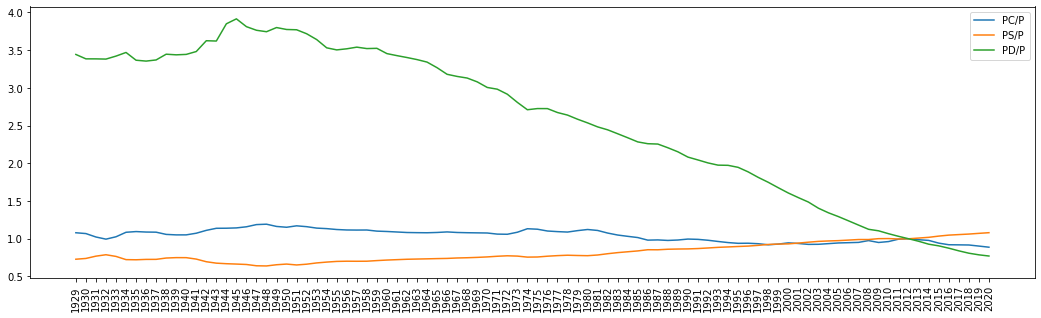

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 5))

axes.plot(price_annual['p_cnd']/price_annual['p_y'], label='PC/P')
axes.plot(price_annual['p_cs']/price_annual['p_y'], label='PS/P')
axes.plot(price_annual['p_cd']/price_annual['p_y'], label='PD/P')
axes.legend()
plt.xticks(rotation='vertical')
plt.show()

Vemos que os duráveis ficaram mais baratos em relação aos demais bens. Enquanto isso, não duráveis permaneceu constante e serviços encareceram.

## Item c) 

Qual é a diferença conceitual das abordagens no **Problema 2** e no **Problema 3**? Uma dessas abordagens seria mais adequada?

# Problema 4) [Consumo e Renda] 

Usando dados do *Bureau of Economic Analysis - National Income and Product Account* (https://www.bea.gov/iTable/index_nipa.cfm) construa a seguinte base de dados



1. Table 1.1.4. Price Indexes for Gross Domestic Product (Index numbers 2012=100, Seasonally adjusted): gross domestic product, durable goods, nondurable goods, services.
2. Table 1.1.5. Gross Domestic Product (Millions of dollars, Seasonally adjusted at annual rates: gross domestic product, durable goods, nondurable goods, services.
3. Table 2.1. Personal Income and Its Disposition (Millions of dollars, Seasonally adjusted at annual rates): disposable personal income, population (midperiod, thousands).



Ao identificar a tabela de interesse clique em MODIFY e selecione o período e a "escala" apropriados. No caso do produto, renda e consumo escolha Millions.

Usando estes dados, construa as seguintes variáveis em frequência trimestral desde 1947:1 e anual desde 1929:

1. Renda pessoal disponível real per capita (**y**);
2. Consumo de bens duráveis real per capita (**cd**);
3. Consumo de bens não duráveis real per capita (**cnd**);
4. Consumo de serviços real per capita (**cs**);
5. Consumo de bens não duráveis e serviços (**ser**)

Para deflacionar as variáveis considere as discussões feitas no **Problema 1** e no **Problema 2**.

## Importando pacotes

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files

## Importando dados

In [ ]:
# Importando os dados do Github
tab114_annual  = pd.read_csv('https://raw.githubusercontent.com/lucasestrela/dec_consumo_poupanca/main/dados/BEA_Tab114_Annual.csv',
                             delimiter = ";")

tab114_quarter = pd.read_csv('https://raw.githubusercontent.com/lucasestrela/dec_consumo_poupanca/main/dados/BEA_Tab114_Quarter.csv',
                             delimiter = ";")

tab115_annual  = pd.read_csv('https://raw.githubusercontent.com/lucasestrela/dec_consumo_poupanca/main/dados/BEA_Tab115_Annual.csv',
                             delimiter = ";")

tab115_quarter = pd.read_csv('https://raw.githubusercontent.com/lucasestrela/dec_consumo_poupanca/main/dados/BEA_Tab115_Quarter.csv',
                             delimiter = ";")

tab21_annual   = pd.read_csv('https://raw.githubusercontent.com/lucasestrela/dec_consumo_poupanca/main/dados/BEA_Tab21_Annual.csv',
                             delimiter = ";")

tab21_quarter  = pd.read_csv('https://raw.githubusercontent.com/lucasestrela/dec_consumo_poupanca/main/dados/BEA_Tab21_Quarter.csv',
                             delimiter = ";")


In [ ]:
tab21_annual.head()

,Line,Unnamed: 1,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,...,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Personal income,85289,76533,65668,50294,47234,54090,60843,69221,74710,69084,73632,79408,97878,126724,156187,169717,175786,182534,194481,213496,211071,233735,264232,282460,299227,302221,324159,347903,367983,378953,402865,422138,440576,468837,492774,528193,570659,620339.0,...,2605118.0,2791597.0,2981057.0,3292716.0,3524881.0,3733084.0,3961598.0,4283399.0,4625573.0,4913791.0,5084914.0,5420868.0,5657948.0,5947110.0,6291376.0,6678529.0,7092489.0,7606662.0,8001868.0,8652601.0,9005595.0,9158965.0,9487549.0,10035076.0,10598246.0,11381708.0,12007782.0,12442208.0,12059109.0,12551597.0,13326770.0,14010140.0,14181095.0,14991715.0,15724240.0,16160714.0,16948592.0,17851832.0,18551503.0,19690964.0
1,2,Compensation of employees,51408,47167,40071,31339,29787,34553,37667,43289,48310,45412,48553,52749,66187,88036,112698,124321,126304,122485,132361,144313,144334,158269,185705,201088,215245,214139,230571,249275,262576,264670,285829,301283,310422,332202,350408,375975,405415,449249.0,...,1792525.0,1892983.0,2012489.0,2215872.0,2387324.0,2542063.0,2722405.0,2947987.0,3139601.0,3340373.0,3450516.0,3668246.0,3817290.0,4006192.0,4198088.0,4416942.0,4708818.0,5071138.0,5402762.0,5848064.0,6039136.0,6135569.0,6354054.0,6720058.0,7066605.0,7479895.0,7878862.0,8056978.0,7758509.0,7924936.0,8225931.0,8566725.0,8834222.0,9249097.0,9699419.0,9963857.0,10422544.0,10950099.0,11432433.0,11448548.0
2,3,Wages and salaries,50460,46214,39157,30514,29027,33734,36722,41954,46139,43013,45985,49860,62085,82098,105786,116749,117493,112005,123097,135550,134733,147253,171607,185636,198989,197263,212151,229026,239951,241317,259842,272855,280519,299358,314851,337788,363757,400321.0,...,1511373.0,1587517.0,1677513.0,1844915.0,1982550.0,2102335.0,2256267.0,2439782.0,2583051.0,2741199.0,2814478.0,2965541.0,3079340.0,3236589.0,3418022.0,3616469.0,3876844.0,4181616.0,4458006.0,4825864.0,4954422.0,4996297.0,5138717.0,5421584.0,5691877.0,6056957.0,6396779.0,6534248.0,6248600.0,6372077.0,6625939.0,6927487.0,7113178.0,7475220.0,7859482.0,8089128.0,8471477.0,8894218.0,9309332.0,9331051.0
3,4,Private industries,45499,41035,33873,25522,23864,27637,30195,34059,38615,34755,37744,41396,51895,66122,79169,83781,82591,91305,105584,116530,113906,124620,142378,152258,164651,162358,175555,190224,198938,197195,213788,223673,228048,243011,254825,272863,293847,321932.0,...,1225524.0,1279980.0,1352718.0,1496777.0,1608687.0,1705115.0,1833150.0,1987745.0,2101945.0,2222150.0,2265713.0,2393540.0,2490330.0,2627093.0,2788996.0,2968375.0,3204957.0,3480303.0,3724240.0,4046077.0,4132424.0,4123431.0,4224765.0,4469245.0,4700557.0,5022433.0,5308235.0,5390397.0,5073377.0,5180903.0,5431088.0,5729178.0,5905172.0,6238320.0,6583727.0,6780935.0,7123737.0,7491711.0,7858536.0,7885483.0
4,5,Government,4961,5179,5284,4992,5163,6097,6527,7895,7524,8258,8241,8464,10190,15976,26617,32968,34902,20700,17513,19020,20827,22633,29229,33378,34338,34905,36596,38802,41013,44122,46054,49182,52471,56347,60026,64925,69910,78389.0,...,285849.0,307537.0,324795.0,348138.0,373863.0,397220.0,423117.0,452037.0,481106.0,519049.0,548765.0,572001.0,589010.0,609496.0,629026.0,648094.0,671887.0,701313.0,733766.0,779787.0,821998.0,872866.0,913952.0,952339.0,991320.0,1034524.0,1088544.0,1143851.0,1175223.0,1191174.0,1194851.0,1198309.0,1208006.0,1236901.0,1275756.0,1308193.0,1347741.0,1402507.0,1450796.0,1445568.0


In [ ]:
# Renomeando Colunas
tab114_annual  = tab114_annual.rename(columns={'Unnamed: 1': 'variavel'})
tab114_quarter = tab114_quarter.rename(columns={'Unnamed: 1': 'variavel'})
tab115_annual  = tab115_annual.rename(columns={'Unnamed: 1': 'variavel'})
tab115_quarter = tab115_quarter.rename(columns={'Unnamed: 1': 'variavel'})
tab21_annual   = tab21_annual.rename(columns={'Unnamed: 1': 'variavel'})
tab21_quarter  = tab21_quarter.rename(columns={'Unnamed: 1': 'variavel'})

In [ ]:
# Verificando quais variáveis estão disponíveis
print(tab115_annual['variavel'])
print()
print(tab21_annual['variavel'])

0                                Gross domestic product
1                     Personal consumption expenditures
2                                                 Goods
3                                         Durable goods
4                                      Nondurable goods
5                                              Services
6                     Gross private domestic investment
7                                      Fixed investment
8                                        Nonresidential
9                                            Structures
10                                            Equipment
11                       Intellectual property products
12                                          Residential
13                        Change in private inventories
14                    Net exports of goods and services
15                                              Exports
16                                                Goods
17                                             S

### Manipulando dados de consumo

1.   Seleciono as variáveis a serem usadas
2.   Concateno todas as variáveis em dois dataframes (anual/tri)
3.   Construo as variáveis desejadas em forma percapta

In [ ]:
population_annual  = tab21_annual.iloc[[42], 2:]
population_quarter = tab21_quarter.iloc[[42], 2:]

# Disposable personal income: Per capita Chained (2012) dollars
y_annual    = tab21_annual.iloc[[41], 2:]
y_quarter   = tab21_quarter.iloc[[41], 2:]

# Personal consumption expenditures: Durable goods                
cd_annual   = tab115_annual.iloc[[3], 2:]
cd_quarter  = tab115_quarter.iloc[[3], 2:]

# Personal consumption expenditures: Nondurable goods
cnd_annual  = tab115_annual.iloc[[4], 2:]
cnd_quarter = tab115_quarter.iloc[[4], 2:]

# Personal consumption expenditures: Services
cs_annual   = tab115_annual.iloc[[5], 2:]
cs_quarter  = tab115_quarter.iloc[[5], 2:]

In [ ]:
##################################################################
###################### --- Dados Anuais --- ######################
##################################################################

# Salvando todas as colunas como um dataframe
cons_annual = pd.concat([population_annual, y_annual, cd_annual, cnd_annual, cs_annual],
                      axis=0).T

# Renomeando as colunas
cons_annual.columns = ['pop', 'y', 'cd', 'cnd', 'cs']

# Salvado como numérico
cons_annual['pop'] = pd.to_numeric(cons_annual['pop'])
cons_annual['y']   = pd.to_numeric(cons_annual['y'])
cons_annual['cd']  = pd.to_numeric(cons_annual['cd'])
cons_annual['cnd'] = pd.to_numeric(cons_annual['cnd'])
cons_annual['cs']  = pd.to_numeric(cons_annual['cs'])

# Criando serviços + nao duraveis
cons_annual['ser'] = cons_annual['cnd'] + cons_annual['cs']

# Criando variáveis per capita
cons_annual['cd_percapta']  = (cons_annual['cd'] / cons_annual['pop'])
cons_annual['cnd_percapta'] = (cons_annual['cnd'] / cons_annual['pop'])
cons_annual['cs_percapta']  = (cons_annual['cs'] / cons_annual['pop'])

print('Dados Anuais')
print(cons_annual.head())
print()
print()
##################################################################
################### --- Dados Trimestrais --- ####################
##################################################################

# Salvando todas as colunas como um dataframe
cons_quarter = pd.concat([population_quarter, y_quarter, cd_quarter, cnd_quarter, cs_quarter],
                          axis=0).T

# Renomeando as colunas
cons_quarter.columns = ['pop', 'y', 'cd', 'cnd', 'cs']

# Salvado como numérico
cons_quarter['pop'] = pd.to_numeric(cons_quarter['pop'])
cons_quarter['y']   = pd.to_numeric(cons_quarter['y'])
cons_quarter['cd']  = pd.to_numeric(cons_quarter['cd'])
cons_quarter['cnd'] = pd.to_numeric(cons_quarter['cnd'])
cons_quarter['cs']  = pd.to_numeric(cons_quarter['cs'])

# Criando serviços + nao duraveis
cons_quarter['ser'] = cons_quarter['cnd'] + cons_quarter['cs']

# Criando variáveis per capita
cons_quarter['cd_percapta']  = (cons_quarter['cd'] / cons_quarter['pop'])
cons_quarter['cnd_percapta'] = (cons_quarter['cnd'] / cons_quarter['pop'])
cons_quarter['cs_percapta']  = (cons_quarter['cs'] / cons_quarter['pop'])

print('Dados Trimestrais')
print(cons_quarter.head())


Dados Anuais
           pop       y    cd  ...  cd_percapta  cnd_percapta  cs_percapta
1929  121878.0  7361.0  9829  ...     0.080646      0.278483     0.275792
1930  123188.0  6822.0  7661  ...     0.062189      0.247613     0.259538
1931  124149.0  6540.0  5911  ...     0.047612      0.207799     0.233292
1932  124949.0  5648.0  3959  ...     0.031685      0.161418     0.196776
1933  125690.0  5452.0  3762  ...     0.029931      0.159074     0.176538

[5 rows x 9 columns]


Dados Trimestrais
              pop       y     cd  ...  cd_percapta  cnd_percapta  cs_percapta
1947_Q1  143143.0  9727.0  20722  ...     0.144764      0.523057     0.423122
1947_Q2  143790.0  9590.0  21351  ...     0.148487      0.534787     0.429675
1947_Q3  144449.0  9801.0  21770  ...     0.150711      0.544476     0.436999
1947_Q4  145122.0  9618.0  23488  ...     0.161850      0.551019     0.442517
1948_Q1  145709.0  9758.0  23547  ...     0.161603      0.559650     0.448009

[5 rows x 9 columns]


### Manipulando dados de preço

1.   Concateno todas as variáveis em dois dataframes (anual/tri)
2.   Construo as variáveis desejadas

In [ ]:
print(tab114_annual['variavel'])
print()

0                                Gross domestic product
1                     Personal consumption expenditures
2                                                 Goods
3                                         Durable goods
4                                      Nondurable goods
5                                              Services
6                     Gross private domestic investment
7                                      Fixed investment
8                                        Nonresidential
9                                            Structures
10                                            Equipment
11                       Intellectual property products
12                                          Residential
13                        Change in private inventories
14                    Net exports of goods and services
15                                              Exports
16                                                Goods
17                                             S

In [ ]:
# Preços Personal consumption expenditures
p_y_annual    = tab114_annual.iloc[[1], 2:]
p_y_quarter   = tab114_quarter.iloc[[1], 2:]

# Preços Durable goods
p_cd_annual   = tab114_annual.iloc[[3], 2:]
p_cd_quarter  = tab114_quarter.iloc[[3], 2:]

# Preços Nondurable goods
p_cnd_annual  = tab114_annual.iloc[[4], 2:]
p_cnd_quarter = tab114_quarter.iloc[[4], 2:]

# Preços Services
p_cs_annual   = tab114_annual.iloc[[5], 2:]
p_cs_quarter  = tab114_quarter.iloc[[5], 2:]

In [ ]:
##################################################################
###################### --- Dados Anuais --- ######################
##################################################################

# Salvando todas as colunas como um dataframe
price_annual = pd.concat([p_y_annual, p_cd_annual, p_cnd_annual, p_cs_annual],
                          axis=0).T

# Renomeando as colunas
price_annual.columns = ['p_y', 'p_cd', 'p_cnd', 'p_cs']

# Salvado a p_y como numérico
price_annual['p_y']   = pd.to_numeric(price_annual['p_y'])
price_annual['p_cd']  = pd.to_numeric(price_annual['p_cd'])
price_annual['p_cnd'] = pd.to_numeric(price_annual['p_cnd'])
price_annual['p_cs']  = pd.to_numeric(price_annual['p_cs'])

price_annual.head(n = 500)


# ##################################################################
# ################### --- Dados Trimestrais --- ####################
# ##################################################################

# Salvando todas as colunas como um dataframe
price_quarter = pd.concat([p_y_quarter, p_cd_quarter, p_cnd_quarter, p_cs_quarter],
                          axis=0).T

# Renomeando as colunas
price_quarter.columns = ['p_y', 'p_cd', 'p_cnd', 'p_cs']

# Salvado a p_y como numérico
price_quarter['p_y']   = pd.to_numeric(price_quarter['p_y'])
price_quarter['p_cd']  = pd.to_numeric(price_quarter['p_cd'])
price_quarter['p_cnd'] = pd.to_numeric(price_quarter['p_cnd'])
price_quarter['p_cs']  = pd.to_numeric(price_quarter['p_cs'])

price_quarter.head(n = 500)


,p_y,p_cd,p_cnd,p_cs
1947_Q1,12.250,46.500,14.518,7.865
1947_Q2,12.348,46.928,14.659,7.908
1947_Q3,12.578,47.190,14.924,8.097
1947_Q4,12.891,47.805,15.375,8.281
1948_Q1,13.034,48.170,15.627,8.329
...,...,...,...,...
2019_Q4,110.529,85.774,99.673,118.781
2020_Q1,110.882,85.406,99.544,119.456
2020_Q2,110.435,84.727,97.808,119.560
2020_Q3,111.431,86.420,98.763,120.380


## Deflacionando as variáveis

In [ ]:
df_annual = pd.DataFrame(columns = [])

df_annual['y']   = (cons_annual['y'] / price_annual['p_y'])
df_annual['cd']  = (cons_annual['cd'] / price_annual['p_cd'])
df_annual['cnd'] = (cons_annual['cnd'] / price_annual['p_cnd'])
df_annual['cs']  = (cons_annual['cs'] / price_annual['p_cs'])

print(df_annual.head())
print()

df_quarter = pd.DataFrame()

df_quarter['y']   = (cons_quarter['y'] / price_quarter['p_y'])
df_quarter['cd']  = (cons_quarter['cd'] / price_quarter['p_cd'])
df_quarter['cnd'] = (cons_quarter['cnd'] / price_quarter['p_cnd'])
df_quarter['cs']  = (cons_quarter['cs'] / price_quarter['p_cs'])

print(df_quarter.head())

               y          cd          cnd           cs
1929  790.315654  306.514485  3374.863279  4951.097363
1930  764.798206  253.759523  3199.056109  4848.650288
1931  821.092279  219.283276  3164.622179  4724.796085
1932  804.100228  166.687718  2885.820575  4439.689419
1933  804.842043  162.337102  2875.593269  4275.337187

                  y          cd          cnd           cs
1947_Q1  794.040816  445.634409  5157.184185  7700.826446
1947_Q2  776.643991  454.973577  5245.719353  7812.721295
1947_Q3  779.217682  461.326552  5269.967837  7795.973817
1947_Q4  746.101932  491.329359  5200.975610  7754.981282
1948_Q1  748.657358  488.831223  5218.276061  7837.555529


# Problema 5) [Retorno de Títulos] 

Usando dados do FRED Economic Data, St. Louis FED (https://fred.stlouisfed.org/), construa a seguinte base de dados:

1. 3-Month Treasury Bill: Secondary Market Rate (Percent, Not Seasonally Adjusted) em frequência trimestral (considere o período mais longo possível). 

Usando estes dados, construa as seguintes variáveis:

1. 3-Month Treasury Bill real (**tb3m**) em frequência trimestral com retorno ao trimestre;
2. 3-Month Treasury Bill real (**tb3m**) em frequência anual com retorno ao ano;


Para deflacionar as variáveis considere as discussões feitas no **Problema 1** e no **Problema 2**.

In [ ]:
pip install fredapi

In [ ]:
from fredapi import Fred
from datetime import datetime

import matplotlib.pyplot as plt

In [ ]:
fred = Fred(api_key='548624ed839059b759900a51992bc8c8')

# Obtendo dados trimestrais do FRED usando a média do período
tb3m_quarter = fred.get_series('DTB3', frequency = 'q', aggregation_method = 'avg')

# Transformando em dataframe
tb3m_quarter = pd.DataFrame(tb3m_quarter, columns = ['T-Bill'])

# Criando a variável anual
tb3m_annual = pd.DataFrame( (tb3m_quarter['T-Bill']/100 + 1)**(1/4) )

# Obtendo os anos separadamente
tb3m_annual['year'] = tb3m_quarter.index.year

# Calculando o retorno acumulado dos quarters para chegar no anual
tb3m_annual = (tb3m_annual.groupby('year').prod() - 1)*100

In [ ]:
print(tb3m_annual.head())
print()
print()


print(tb3m_quarter.head())

        T-Bill
year          
1954  0.939940
1955  1.726639
1956  2.624687
1957  3.224940
1958  1.773144


            T-Bill
1954-01-01    1.06
1954-04-01    0.79
1954-07-01    0.88
1954-10-01    1.03
1955-01-01    1.23


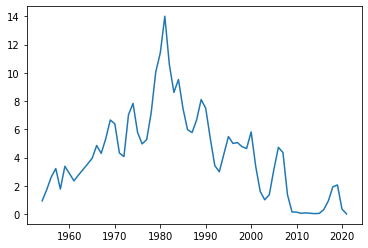

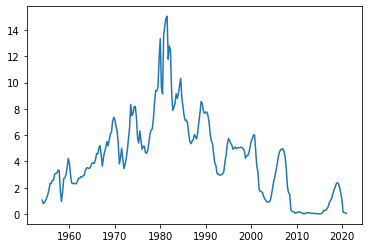

In [ ]:
plt.plot(tb3m_annual)
plt.show()

plt.plot(tb3m_quarter)
plt.show()


In [ ]:

# Exportanto dados
# price_annual.to_csv('price_annual.csv')
# files.download('price_annual.csv')

## Deflacionando os retornos

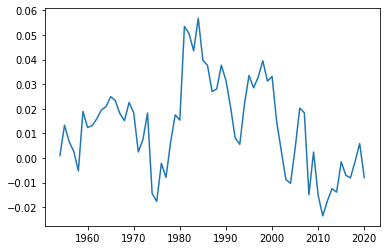

In [ ]:
##################################################################
###################### --- Dados Anuais --- ######################
##################################################################

# Transformando o ano (indice) em número
tb3m_annual['year1'] = pd.to_numeric(tb3m_annual.index)

# Tirando a diferença no indice de preço para encontrar a inflação
deflator_anual = pd.DataFrame( price_annual['p_y'].diff()/price_annual['p_y'] + 1 )

# Transformando o ano (indice) em número
deflator_anual['year1'] = pd.to_numeric(deflator_anual.index)

#Selecionando apenas os anos que quero
deflator_anual = deflator_anual[deflator_anual['year1'] >= 1954]

# Juntando os datasets
tb3m_annual_real = pd.merge(tb3m_annual, deflator_anual, how="left", on=["year1"])

# Deflacionando e obtendo os juros reais
tb3m_annual_real['tb3m_real'] = ( (1 + tb3m_annual_real['T-Bill']/100) / tb3m_annual_real['p_y'] ) - 1

# Plotando o gráfico do real
plt.plot(tb3m_annual_real['year1'], tb3m_annual_real['tb3m_real'])



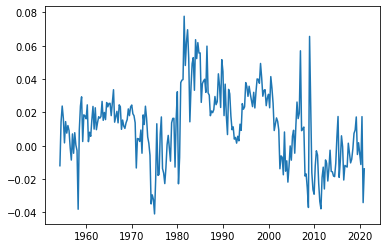

In [ ]:
#######################################################################
###################### --- Dados Trimestrais --- ######################
#######################################################################


# Tirando a diferença no indice de preço para encontrar a inflação
# Deve-se atentar aqui, pois a inflação está medida em % ao tri, enquanto
# que a t.bill está medida em %a.a., entao eu elevo a 4 a inflação, anualizando a tx
deflator_quarter = pd.DataFrame( (price_quarter['p_y'].diff()/price_quarter['p_y'] + 1)**4 )

# Transformando o ano (indice) em número
deflator_quarter['year1']= deflator_quarter.index.str[:4]
deflator_quarter['year1'] = pd.to_numeric(deflator_quarter['year1'])


# Selecionando apenas os anos que quero
deflator_quarter = deflator_quarter[deflator_quarter['year1'] >= 1954]

# O primeiro quarter do ano, na verdade é o ultimo quarter do ano anterior
tb3m_quarter = tb3m_quarter[1:]
tb3m_quarter = tb3m_quarter[:-1]

# Igualando os indices
deflator_quarter.index = tb3m_quarter.index

# Renomeando os indices
deflator_quarter.index.name = 'date'
tb3m_quarter.index.name     = 'date'


# Juntando os datasets
tb3m_quarter_real = pd.merge(tb3m_quarter, deflator_quarter, how="left", on=["date"])

# Deflacionando e obtendo os juros reais
tb3m_quarter_real['tb3m_real'] = ( (1 + tb3m_quarter_real['T-Bill']/100) / tb3m_quarter_real['p_y'] ) - 1

# Plotando o gráfico do real
plt.plot(tb3m_quarter_real['tb3m_real'])

# Problema 6) [Retorno de Ações]

Usando dados do Economática, construa a seguinte base de dados em frequência
mensal:
1. Índice Standard & Poors 500 (considere o período mais longo possível);
2. Índice NYSE Composite (considere o período mais longo possível);

Usando estes dados, cosntrua as seguintes variáveis:

1. Standard & Poors 500 (**sp500**) em frequência trimestral com retorno ao trimestre;
2. Standard & Poors 500 (**sp500**) em frequência anual com retorno ao ano;
3. NYSE Composite (**nyse**) em frequência trimestral com retorno ao trimestre;
4. NYSE Composite (**nyse**) em frequência anual com retorno ao ano.

Para deflacionar as variáveis considere as discussões feitas no **Problema 1** e no **Problema 2**

In [ ]:
sp500  = pd.read_csv('https://raw.githubusercontent.com/lucasestrela/dec_consumo_poupanca/main/dados/sp500.csv',
                             delimiter = ",")

nyse = pd.read_csv('https://raw.githubusercontent.com/lucasestrela/dec_consumo_poupanca/main/dados/nya.csv',
                             delimiter = ",")


In [ ]:
#################################################
################# --- SP500 --- #################
#################################################

# Seleciono apenas as colunas que quero
sp500 = sp500[['ref.date', 'price.close']]

# Ajustando a data
sp500['ref.date'] = pd.to_datetime(sp500['ref.date'], format = "%Y-%m-%d")

# Criando uma coluna com o mês
sp500['month'] = sp500['ref.date'].dt.month

# Filtrando somente os trimestres
sp500_quarter = sp500[sp500['month'].isin([3, 6, 9, 12])]
sp500_annual = sp500[sp500['month'].isin([12])]

# Calculando os retornos
sp500_quarter['ret_nom'] = sp500_quarter['price.close'].diff()/sp500_quarter['price.close']
sp500_annual['ret_nom']  = sp500_annual['price.close'].diff()/sp500_annual['price.close']

# Removendo missings
sp500_quarter = sp500_quarter.dropna()
sp500_annual = sp500_annual.dropna()

#################################################
################# --- NYSE --- ##################
#################################################

# Seleciono apenas as colunas que quero
nyse = nyse[['ref.date', 'price.close']]

# Ajustando a data
nyse['ref.date'] = pd.to_datetime(nyse['ref.date'], format = "%Y-%m-%d")

# Criando uma coluna com o mês
nyse['month'] = nyse['ref.date'].dt.month

# Filtrando somente os trimestres
nyse_quarter = nyse[sp500['month'].isin([3, 6, 9, 12])]
nyse_annual = nyse[sp500['month'].isin([12])]

# Calculando os retornos
nyse_quarter['ret_nom'] = nyse_quarter['price.close'].diff()/nyse_quarter['price.close']
nyse_annual['ret_nom']  = nyse_annual['price.close'].diff()/nyse_annual['price.close']
 

# Removendo missings
nyse_quarter = nyse_quarter.dropna()
nyse_annual  = nyse_annual.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/l

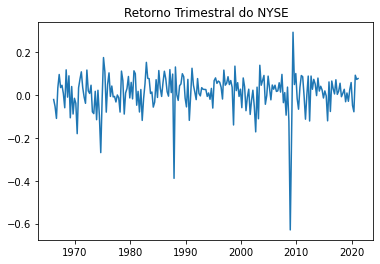

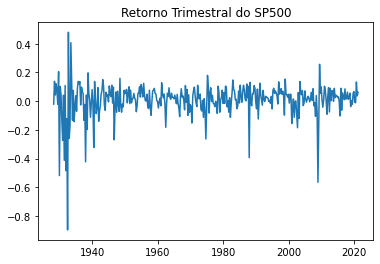

In [ ]:
plt.plot(nyse_quarter['ref.date'], nyse_quarter['ret_nom'])
plt.title("Retorno Trimestral do NYSE")
plt.show()

plt.plot(sp500_quarter['ref.date'], sp500_quarter['ret_nom'])
plt.title("Retorno Trimestral do SP500")
plt.show()

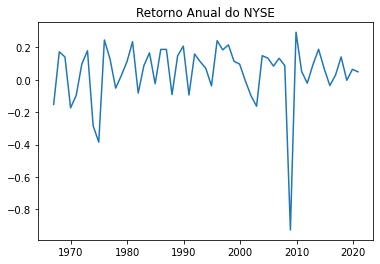

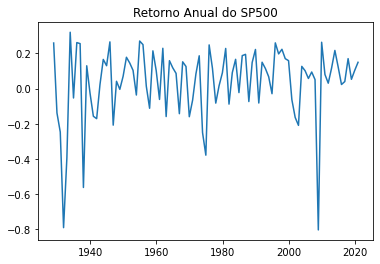

In [ ]:
plt.plot(nyse_annual['ref.date'], nyse_annual['ret_nom'])
plt.title("Retorno Anual do NYSE")
plt.show()

plt.plot(sp500_annual['ref.date'], sp500_annual['ret_nom'])
plt.title("Retorno Anual do SP500")
plt.show()

## Deflacionando os retornos

In [ ]:
###########################################
################## Anual ##################
###########################################

# Tirando a diferença no indice de preço para encontrar a inflação
deflator_anual = pd.DataFrame( price_annual['p_y'].diff()/price_annual['p_y'] + 1 )

# Transformando o ano (indice) em número
deflator_anual['year1'] = pd.to_numeric(deflator_anual.index)


# Coluna com anos
nyse_annual['year1']  = nyse_annual['ref.date'].dt.year
sp500_annual['year1'] = sp500_annual['ref.date'].dt.year


# Juntando os datasets
nyse_annual_real  = pd.merge(nyse_annual, deflator_anual, how="left", on=["year1"])
sp500_annual_real = pd.merge(sp500_annual, deflator_anual, how="left", on=["year1"])


# Calculando o retorno real
sp500_annual_real['ret_real']  = (1+sp500_annual_real['ret_nom'])/sp500_annual_real['p_y'] - 1
nyse_annual_real['ret_real']   = (1+nyse_annual_real['ret_nom'])/nyse_annual_real['p_y'] - 1

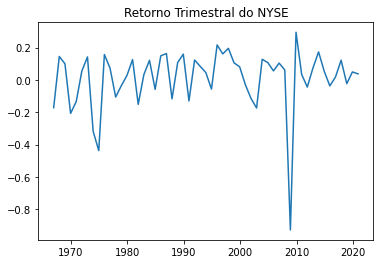

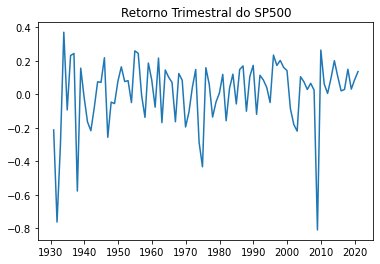

In [ ]:
plt.plot(nyse_annual_real['ref.date'], nyse_annual_real['ret_real'])
plt.title("Retorno Trimestral do NYSE")
plt.show()

plt.plot(sp500_annual_real['ref.date'], sp500_annual_real['ret_real'])
plt.title("Retorno Trimestral do SP500")
plt.show()

In [ ]:
#######################################################################
###################### --- Dados Trimestrais --- ######################
#######################################################################


# Tirando a diferença no indice de preço para encontrar a inflação
# Deve-se atentar aqui, pois a inflação está medida em % ao tri, enquanto
# que a t.bill está medida em %a.a., entao eu elevo a 4 a inflação, anualizando a tx
deflator_quarter = pd.DataFrame( (price_quarter['p_y'].diff()/price_quarter['p_y'] + 1)**4 )

# Ajustando as datas
deflator_quarter['ref.date']= deflator_quarter.index.str[:4].astype(str) + '-' + (pd.to_numeric(deflator_quarter.index.str[6:])*3).astype(str)
deflator_quarter['ref.date'] = pd.to_datetime(deflator_quarter['ref.date'], format = "%Y-%m")


# Ajustando as datas
nyse_quarter['ref.date']  = nyse_quarter['ref.date'].dt.year.astype(str) + '-' + nyse_quarter['ref.date'].dt.month.astype(str)
sp500_quarter['ref.date'] = sp500_quarter['ref.date'].dt.year.astype(str) + '-' + sp500_quarter['ref.date'].dt.month.astype(str)

# Transformando as datas em formato de data
nyse_quarter['ref.date']  = pd.to_datetime(nyse_quarter['ref.date'], format = "%Y-%m")
sp500_quarter['ref.date'] = pd.to_datetime(sp500_quarter['ref.date'], format = "%Y-%m")



# Juntando os datasets
nyse_quarter_real  = pd.merge(nyse_quarter, deflator_quarter, how="left", on=["ref.date"])
sp500_quarter_real = pd.merge(sp500_quarter, deflator_quarter, how="left", on=["ref.date"])

# Calculando o retorno real
nyse_quarter_real['ret_real']  = (1+nyse_quarter_real['ret_nom'])/nyse_quarter_real['p_y'] - 1
sp500_quarter_real['ret_real']   = (1+sp500_quarter_real['ret_nom'])/sp500_quarter_real['p_y'] - 1


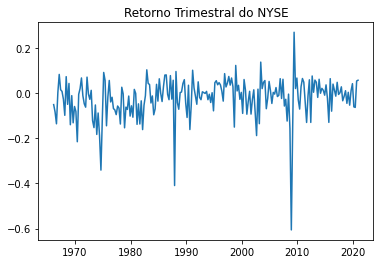

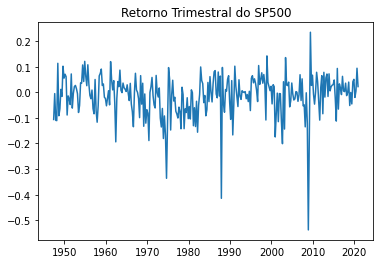

In [ ]:
plt.plot(nyse_quarter_real['ref.date'], nyse_quarter_real['ret_real'])
plt.title("Retorno Trimestral do NYSE")
plt.show()

plt.plot(sp500_quarter_real['ref.date'], sp500_quarter_real['ret_real'])
plt.title("Retorno Trimestral do SP500")
plt.show()